## <p style="text-align: center;">B9AI103_2122_TMD3_CA_1</p>
### <p style="text-align: center;"> Details </p>
#### <p style="text-align: center;">Name: Sunil Judhistira Gauda</p>
#### <p style="text-align: center;">Student ID : 10595858 </p>

#### Project - Speeach Emotion Detection using Audio Processing and Speeach Recognition API
##### Description
- Capture - Recording Audio and Saving it for analysis.
- Analysis - Checking the wawe of audio to get visual view of how our audio looks graphically
- Audio
- Using Logistic Regression and Datasets from the gratious Yelp, Amazon and imdb Datasets i have trained this models and provided a sentiment analysis over the input statement

### Business Undestanding
Words we use to speak provides combinations of diffrent letters to express emotion of a individual, with speach recognition and NLP we can use those words to describe a particular range of emotion, in this project 2 such extreme emotions are detected to analyze weather the person is **Happy** or **Sad**

#### Imports

Note : Some imports like pyaudio requires windows sepcific installation for VC++ library, please follow the instructions below with an andminstartor window of a Shell, inside your project environment.
* pip install pipwin
* pipwin install pyaudio

In [1]:
import pyaudio
import numpy as np
import wave
import speech_recognition as sr
from os import path
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud, STOPWORDS


#### Data Understanding

The data we consume is live data recorded via pyaudio interface, exploration of the data will begin after we record the audio.

##### Audio Parameters

* chunk - defines the arbitary number frame in terms of a memory chunk for the recorded audio
* format - defines output format which we will use to analysie the audio
* channels - defines number of audio channels we will be recording the audio in
* rate - defines what is the rate of playback as per each frame

In [2]:
chunk = 1024
format = pyaudio.paInt16
channels = 1
rate = 44100


##### Audio Recording

Audio Recording is done by using **pyaudio** , pyaudio provides us implementaion for recording and storing audio, which we will use to capture and analyse the data.

In [3]:
# Py audio Instance
p = pyaudio.PyAudio()

# Defining the audio Params and opening the record stream
stream = p.open(format=format,
                channels=channels,
                rate=rate,
                input=True,
                frames_per_buffer=chunk)

print("...Start Recording")

# Frame Variable - to capture the frames as int values
frames = []

# Mximum number of recording time - can be changed as required
seconds = 6

# Recording the audio
for i in range(0, int(rate/chunk*seconds)):
    data = stream.read(chunk)
    frames.append(data)

print("Recording Stopped...")

# Closing the record steam
stream.stop_stream()
stream.close()
p.terminate()

# Setting the audio params and saving it
wf = wave.open("output.wav", "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(format))
wf.setframerate(rate)
wf.writeframes(b''.join(frames))
wf.close()


...Start Recording
Recording Stopped...


#### Data Undestanding

Exploratory analysis of the data to check the params and visual output of the recorded and sample data

##### Audio Analysis
* Open the Audio file
* Check the Params
* Derive the length
* Check Frames
* Visualise the frames for a samples and recorded audio 

**Open the Audio File**

In [4]:
w_obj = wave.open("output.wav")

**Check the Params**

In [5]:
print("Number of Channels", w_obj.getnchannels())
print("Sample Width", w_obj.getsampwidth())
print("Frame Rate", w_obj.getframerate())
print("Number of Frames", w_obj.getnframes())
print("Values in each frame", w_obj.getparams())


Number of Channels 1
Sample Width 2
Frame Rate 44100
Number of Frames 264192
Values in each frame _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264192, comptype='NONE', compname='not compressed')


**Derive the length**

In [6]:
# Time of the audio
t_audio = w_obj.getnframes()/ w_obj.getframerate()
print("Time in Seconds",t_audio)

Time in Seconds 5.990748299319728


**Check Frames**

In [7]:
# Get the frames
#  -1 reads all frames
frames = w_obj.readframes(-1)
print(type(frames), type(frames[0]))
# It is as per sample rate i.e, two bytes per sample.
print(len(frames))
w_obj.close()


<class 'bytes'> <class 'int'>
528384


**Visualise Recorded Audio**

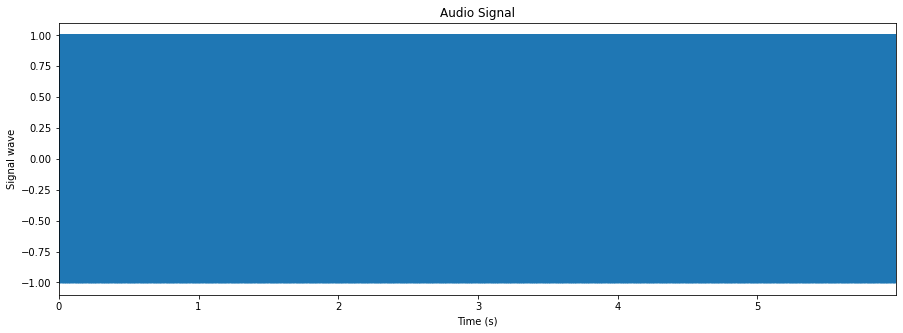

In [8]:
signal_array = np.frombuffer(frames, dtype=np.int16)
times = np.linspace(0, t_audio, num=w_obj.getnframes())
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal wave")
plt.xlabel("Time (s)")
plt.xlim(0, t_audio)
plt.show()


**Visualise Speeach Audio**

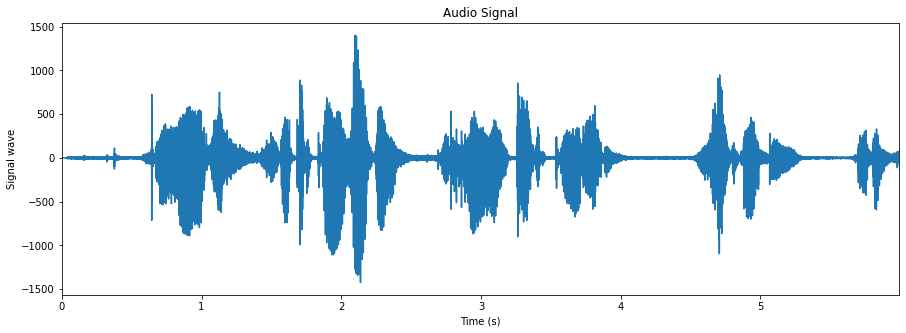

In [9]:
s_obj = wave.open("speech_output.wav")
s_frames = s_obj.readframes(-1)
signal_array = np.frombuffer(s_frames, dtype=np.int16)
times = np.linspace(0, t_audio, num=s_obj.getnframes())
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal wave")
plt.xlabel("Time (s)")
plt.xlim(0, t_audio)
plt.show()


**Visualise Blank Audio**

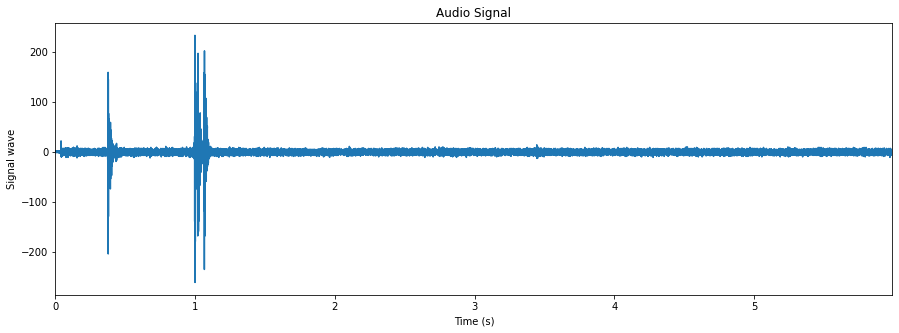

In [10]:
b_obj = wave.open("blank_output.wav")
b_frames = b_obj.readframes(-1)
signal_array = np.frombuffer(b_frames, dtype=np.int16)
times = np.linspace(0, t_audio, num=b_obj.getnframes())
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal wave")
plt.xlabel("Time (s)")
plt.xlim(0, t_audio)
plt.show()


#### Data Preparation
* Open the output file
* Feed the output file to Speeach Recognisation API
* Analyse the Audio


**Opening the output file and using the Google API to get the text and analysing it**

In [11]:

# obtain path to "Daily_English_Conversation_02_Do_you_speak_English.wav" in the same folder as this script
AUDIO_FILE = path.join("output.wav")
sentence = []

# use the audio file as the audio source
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
    print("Say something!")
    audio = r.record(source)  # read the entire audio file
try:
    # for testing purposes, we're just using the default API key
    # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
    # instead of `r.recognize_google(audio)`
    print("Decoded Audio:\n"+ r.recognize_google(audio))
    sentence.append(r.recognize_google(audio))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

Say something!
Google Speech Recognition could not understand audio


**Generating** a **wordcloud** to see what words are contained in our sentence

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(sentence[0])
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

IndexError: list index out of range

##### Vectorisation of the data and importing datasets for analysis

In [13]:


filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer()
try :
    vectorizer.fit(sentence)
    vectorizer.vocabulary_
    predictor=vectorizer.transform(sentence)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
except :
    print("Improper Audio Input, please check if the audio is recorded and has speeach in it")

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object
Improper Audio Input, please check if the audio is recorded and has speeach in it


#### Modeling
Using the prepared data to run through a model prepared to train the model to determine the desirable outcome, in this case **Happy** or **Sad**

In [14]:

try :
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    print("Accuracy:", score)
except :
    print("No Input Provided")

No Input Provided


#### Evaluation
Checking the accuracy against the refernce data set , that is yelp, amazon, imdb data.

In [ ]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    predictor = vectorizer.transform(sentence)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [ ]:
try :
    modsent = str(sentence).replace('[','').replace(']','')

    if model.predict(predictor) == 1:
        print(modsent+" -> This Statment says you are Happy")
    else: print(modsent+" -> This Statment says you are Sad")
except :
    print("The Output is not available as there is no input")

"hi how are you I don't feel alright today" -> This Statment says you are Happy


#### Deployment of the model

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))


### Using the Pickled Model
Deployment has many options as per availabe resources , we have loaded and run the model as our option 1 states.
1. We can use the pickled model as shown below
2. we can use it as a static file in a flask or any web python framework
3. We can use it as a simple python file in a local application

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)


try :
    modsent = str(sentence).replace('[','').replace(']','')

    if pickled_model.predict(predictor) == 1:
        print(modsent+" -> This Statment says you are Happy")
    else: print(modsent+" -> This Statment says you are Sad")
except :
    print("The Output is not available as there is no input")

"hi how are you I don't feel alright today" -> This Statment says you are Happy
